In [3]:
import pandas, numpy, seaborn
from matplotlib import pyplot

In [4]:
dom = pandas.read_csv('correlationtriplets/v2dom_SEsum_actual.txt', sep='\t', index_col=0)

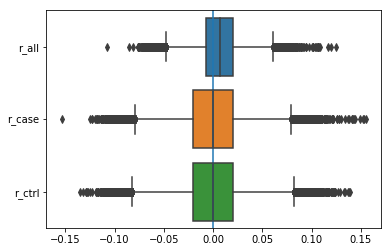

In [5]:
r_values = dom.loc[:, ['r_all', 'r_case', 'r_ctrl']]
seaborn.boxplot(data=r_values, orient='h')
pyplot.gca().axvline(0)
# correlations + 0 0 means that it's the data reuse or group mismatch confounder scenario, possible mixed with the synergism one, i.e. it would contains false positives
# can't be data reuse since I don't select SNPs, so must be case-control group genetic mismatch
pyplot.savefig('correlations_EIRA_all_SE.pdf')

In [6]:
import dr_tools
rsids_knownrisk = set(dr_tools.loadlist('../../RAriskSNPs_20131120_Okada.txt')) | set(dr_tools.loadlist('../../RAriskSNPs_Karlsson2010ARD_Table2.txt')) | set(dr_tools.loadlist('../../RAriskSNPs_Stahl2010NatGen_Table2and3.txt')) 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


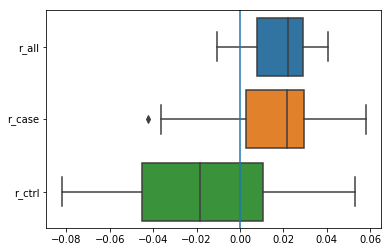

In [7]:
dom_risk = dom.loc[rsids_knownrisk, :]
dom_risk_sel = dom_risk.loc[dom_risk['OR_B']>=1.1, ['r_all', 'r_case', 'r_ctrl']]
seaborn.boxplot(data=dom_risk_sel, orient='h')
pyplot.gca().axvline(0)

In [8]:
from scipy import stats
print(stats.ttest_1samp(dom['r_all'],0))
print(stats.ttest_1samp(dom['r_case'],0))
print(stats.ttest_1samp(dom['r_ctrl'],0))

Ttest_1sampResult(statistic=179.92937744899305, pvalue=0.0)
Ttest_1sampResult(statistic=-0.22326190073841906, pvalue=0.8233318398638791)
Ttest_1sampResult(statistic=0.9995614848543166, pvalue=0.3175236301782674)


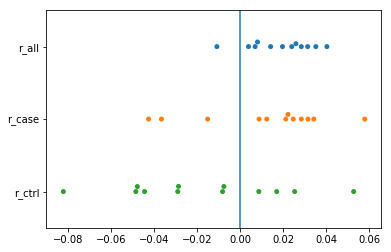

In [9]:
seaborn.swarmplot(data=dom_risk_sel, orient='h')
pyplot.gca().axvline(0)
pyplot.savefig('correlations_EIRA_risk_SE.pdf')

In [35]:
from scipy import stats
print(stats.ttest_1samp(dom_risk_sel['r_all'],0))
print(stats.ttest_1samp(dom_risk_sel['r_case'],0))
print(stats.ttest_1samp(dom_risk_sel['r_ctrl'],0))
# so it's + 0 0 here too, might mean case-control group genetic mismatch, since there's no data reuse

Ttest_1sampResult(statistic=4.413334518919991, pvalue=0.0010399402187779225)
Ttest_1sampResult(statistic=1.4360393495870671, pvalue=0.17881405637472084)
Ttest_1sampResult(statistic=-1.4604577576859377, pvalue=0.17212979175242527)


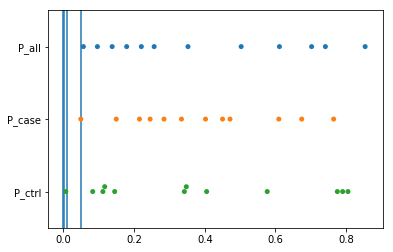

In [37]:
dom_risk_P = dom_risk.loc[dom_risk['OR_B']>=1.1, ['P_all', 'P_case', 'P_ctrl']]
seaborn.swarmplot(data=dom_risk_P, orient='h')
pyplot.gca().axvline(0)
pyplot.gca().axvline(0.05)
pyplot.gca().axvline(0.01)
pyplot.gca().axvline(0.001)

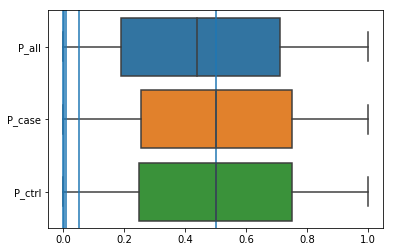

In [42]:
dom_P = dom.loc[dom['OR_B']>=1.1, ['P_all', 'P_case', 'P_ctrl']]
seaborn.boxplot(data=dom_P, orient='h')
pyplot.gca().axvline(0)
pyplot.gca().axvline(0.05)
pyplot.gca().axvline(0.01)
pyplot.gca().axvline(0.001)
pyplot.gca().axvline(0.5)

In [41]:
for col in dom_P.columns:
    print(col, [numpy.mean(dom_P[col]<=thr) for thr in [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]])

P_all [0.002191035206476239, 0.01887749806842949, 0.07841599686336012, 0.1424864790064232, 0.2600412837159957, 0.5570303400717276]
P_case [0.0011416446602165666, 0.01009029371403531, 0.048929275689887794, 0.0989425372187691, 0.19655892154940785, 0.4975725636265092]
P_ctrl [0.0008072234971228248, 0.010147952535258369, 0.04891774392564319, 0.09893100545452449, 0.19949952143178384, 0.49957909060507166]
